<a href="https://colab.research.google.com/github/kiing-dom/CS4287/blob/main/Assignment2CNN/CS4287_Assign2_20243561_20250762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS4287 CNN**

In [ ]:
# 20243561 - Dominion Gbadamosi  --- 20250762 - Dennis Kolomiyets
# Runs

In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import random
import os

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data Visualization



In [ ]:
# using pandas to read the csv
dataset = "all_letters_info.csv"
df = pd.read_csv(dataset)

#display the header of the dataset
display(df.head())

,letter,label,file,background
0,а,1,01_01.png,0
1,а,1,01_02.png,0
2,а,1,01_03.png,0
3,а,1,01_04.png,0
4,а,1,01_05.png,0


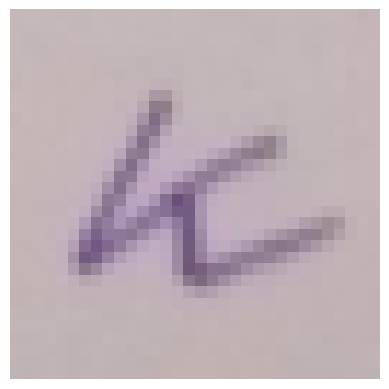

In [ ]:
#folder path where the images are stored
images_folder = "all_letters_image/all_letters_image/"

#get list of all image files in the folder
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

#choose a random image
random_image_file = random.choice(image_files)

#create the full path to the random image
random_image_path = os.path.join(images_folder, random_image_file)

#load and display the random image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
labels = df['label'] #corresponding to the "label" column in the csv file
file_names = df['file'] #corresponds to the "file" column in the csv file

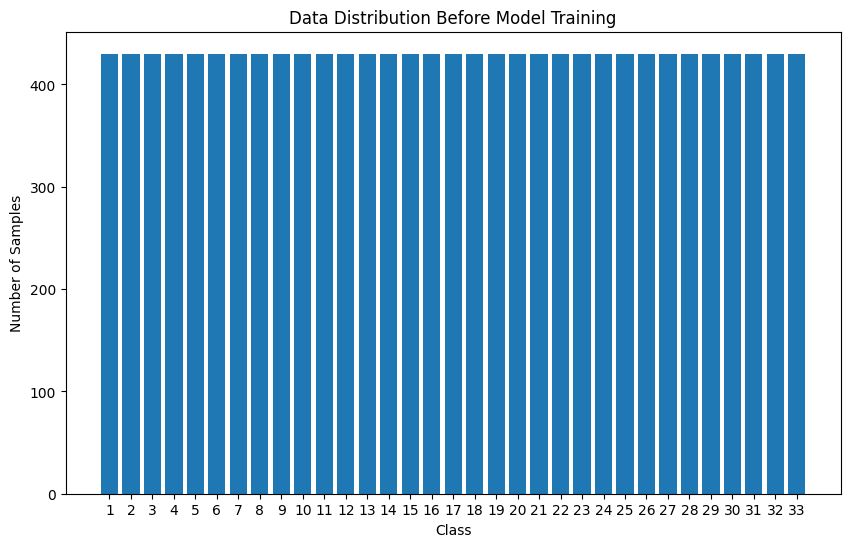

Class 1: 430 samples
Class 2: 430 samples
Class 3: 430 samples
Class 4: 430 samples
Class 5: 430 samples
Class 6: 430 samples
Class 7: 430 samples
Class 8: 430 samples
Class 9: 430 samples
Class 10: 430 samples
Class 11: 430 samples
Class 12: 430 samples
Class 13: 430 samples
Class 14: 430 samples
Class 15: 430 samples
Class 16: 430 samples
Class 17: 430 samples
Class 18: 430 samples
Class 19: 430 samples
Class 20: 430 samples
Class 21: 430 samples
Class 22: 430 samples
Class 23: 430 samples
Class 24: 430 samples
Class 25: 430 samples
Class 26: 430 samples
Class 27: 430 samples
Class 28: 430 samples
Class 29: 430 samples
Class 30: 430 samples
Class 31: 430 samples
Class 32: 430 samples
Class 33: 430 samples


In [ ]:
y_train = df['label']

# Assuming class_labels is a list of class names
class_labels = sorted(y_train.unique())  # Assuming labels are integers

# Count the number of samples for each class
class_counts = y_train.value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts[class_labels], tick_label=class_labels)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Data Distribution Before Model Training')
plt.show()

# Print the exact counts
for label in class_labels:
    count = class_counts[label] if label in class_counts else 0
    print(f"Class {label}: {count} samples")

## Data Preprocessing

In [ ]:
# Preprocessing data
le = LabelEncoder()
labels = le.fit_transform(labels)

#Image Preprocessing
images = []

for file_name in file_names:
  # create the full file path
  file_path = os.path.join(images_folder, file_name)

  # load and preprocess the image
  img = tf.keras.preprocessing.image.load_img(file_path, target_size=(32,32))
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = img / 255.0 #Normalization of pixel values to the range [0, 1] to make values more suitable for neural network
  images.append(img)

images = np.array(images)

#splitting the dataset into training & test data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Adjust num_classes based on the actual number of classes
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=33)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=33)  # Adjust num_classes based on the actual number of classes



## Creating the Model

In [ ]:
# Creating A Sequential Model
model = tf.keras.models.Sequential()

# adding a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (32, 32, 3)))

#adding a MaxPooling layer to downsample the spatial dimensions
model.add(tf.keras.layers.MaxPooling2D(2, 2))

#adding a convolutional layer with 64 filters and a 3x3 kernel
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

#adding another MaxPooling layer
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#flatten the output before deeding it into the dense layers
model.add(tf.keras.layers.Flatten())

#adding a Dense layer with 64 units and ReLU activation
model.add(tf.keras.layers.Dense(64, activation='relu'))

#adding the output layer with as many units as there are classes and softmax
# activation for multiclass classificaiton
model.add(tf.keras.layers.Dense(33, activation='softmax'))  # Assuming there are 33 classes (letters in cyrillic alphabet)

# Compiling the model but including the top 5 accuracy metric
top5_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', top5_acc])

#display summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

## Training

In [ ]:
# Assuming X_train_resized and y_train_one_hot are your training data
# Adjust batch_size and epochs as needed
batch_size = 2
epochs = 100

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/100
284/284 [==============================] - 12s 8ms/step - loss: 3.3241 - accuracy: 0.0777 - top_k_categorical_accuracy: 0.2912 - val_loss: 2.8277 - val_accuracy: 0.2056 - val_top_k_categorical_accuracy: 0.5667
Epoch 2/100
284/284 [==============================] - 1s 5ms/step - loss: 2.4889 - accuracy: 0.2917 - top_k_categorical_accuracy: 0.6641 - val_loss: 2.1880 - val_accuracy: 0.3769 - val_top_k_categorical_accuracy: 0.7358
Epoch 3/100
284/284 [==============================] - 1s 5ms/step - loss: 2.0287 - accuracy: 0.4287 - top_k_categorical_accuracy: 0.7730 - val_loss: 1.9034 - val_accuracy: 0.4571 - val_top_k_categorical_accuracy: 0.8014
Epoch 4/100
284/284 [==============================] - 2s 6ms/step - loss: 1.7325 - accuracy: 0.5125 - top_k_categorical_accuracy: 0.8224 - val_loss: 1.6395 - val_accuracy: 0.5363 - val_top_k_categorical_accuracy: 0.8415
Epoch 5/100
284/284 [==============================] - 1s 5ms/step - loss: 1.5223 - accuracy: 0.5706 - top_k_catego

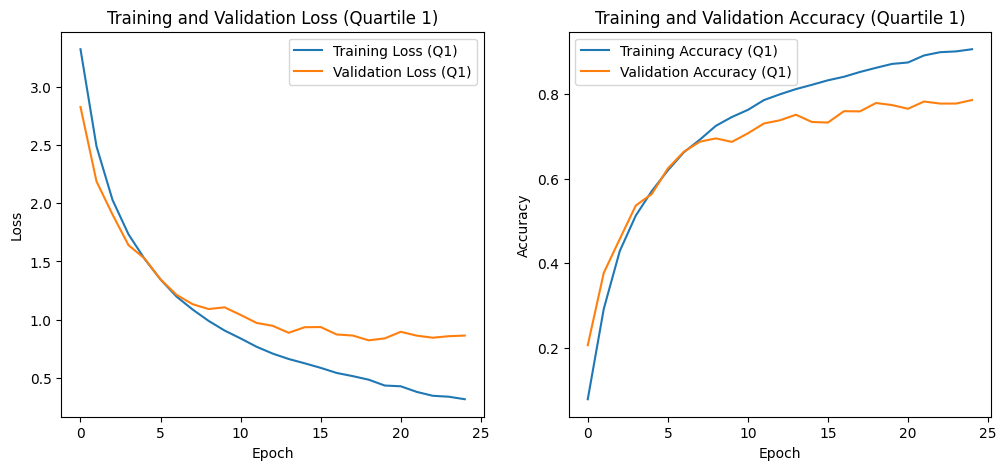

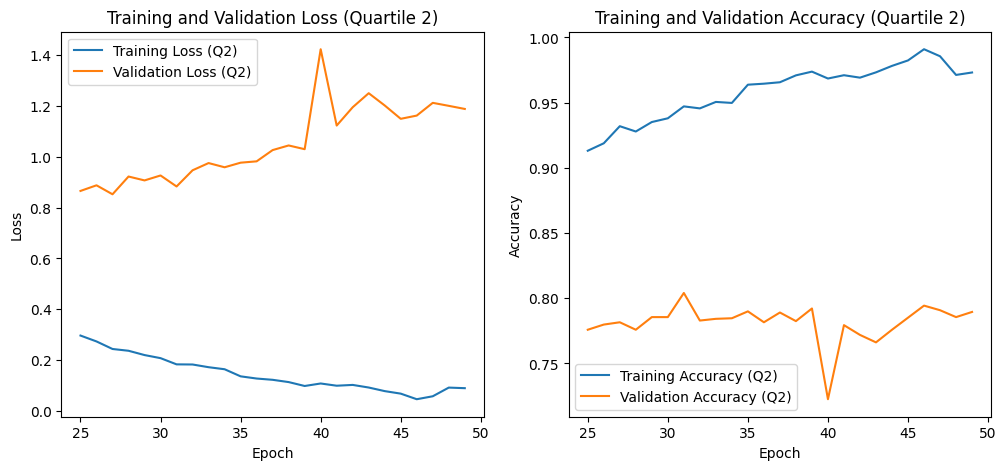

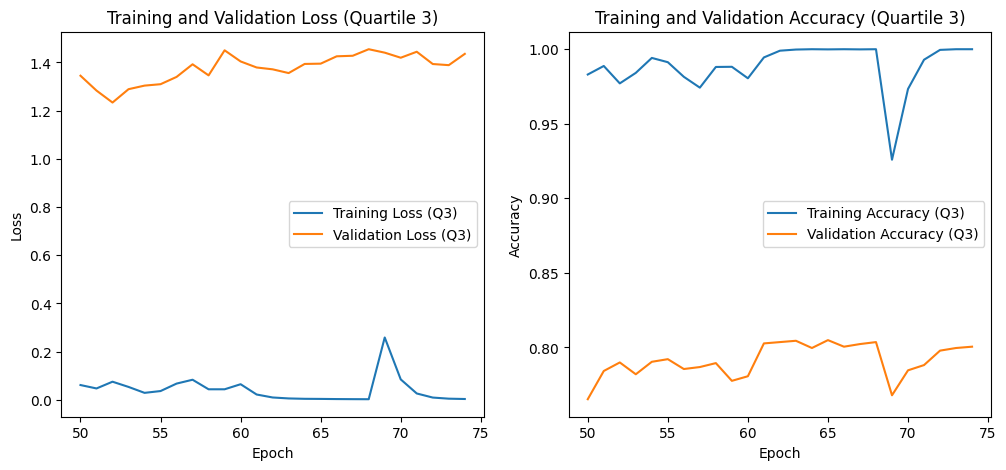

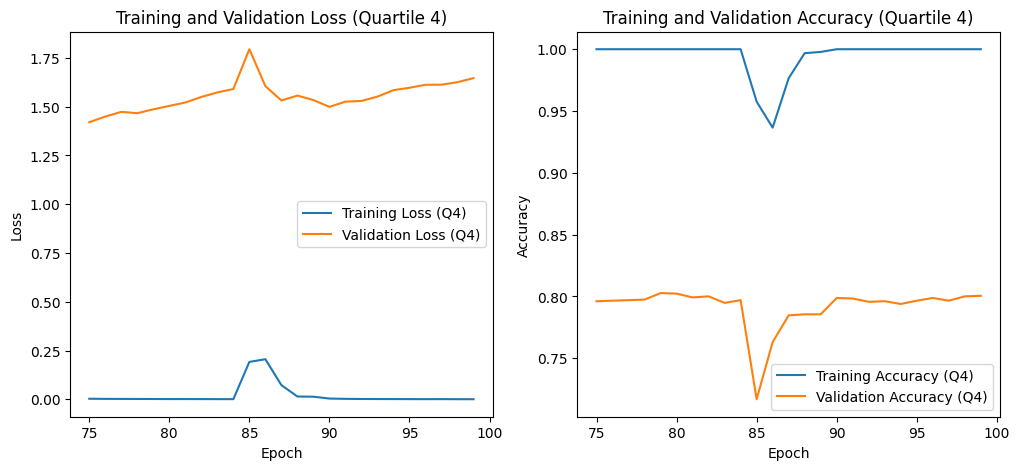

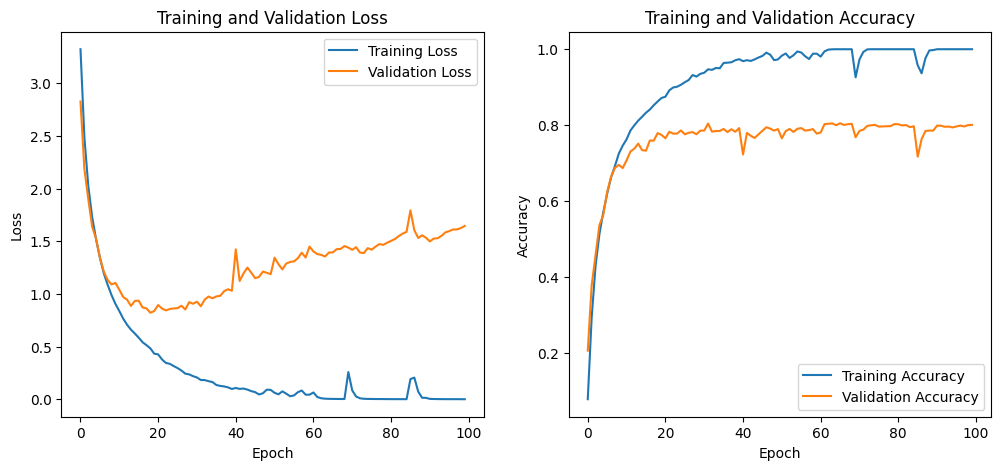

In [ ]:
#plots for the model loss and accuracy

# Divide epochs into quartiles
num_epochs = len(history.history['loss'])
quartile_size = num_epochs // 4

# Plot training and validation loss for each quartile
for i in range(4):
    start_idx = i * quartile_size
    end_idx = (i + 1) * quartile_size if i < 3 else num_epochs

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(start_idx, end_idx), history.history['loss'][start_idx:end_idx], label=f'Training Loss (Q{i + 1})')
    plt.plot(range(start_idx, end_idx), history.history['val_loss'][start_idx:end_idx], label=f'Validation Loss (Q{i + 1})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss (Quartile {i + 1})')
    plt.legend()

    # Plot training and validation accuracy for each quartile
    plt.subplot(1, 2, 2)
    plt.plot(range(start_idx, end_idx), history.history['accuracy'][start_idx:end_idx], label=f'Training Accuracy (Q{i + 1})')
    plt.plot(range(start_idx, end_idx), history.history['val_accuracy'][start_idx:end_idx], label=f'Validation Accuracy (Q{i + 1})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy (Quartile {i + 1})')
    plt.legend()

    plt.show()

  # Overall plot for both accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## Evaluation / Results


89/89 [==============================] - 0s 2ms/step


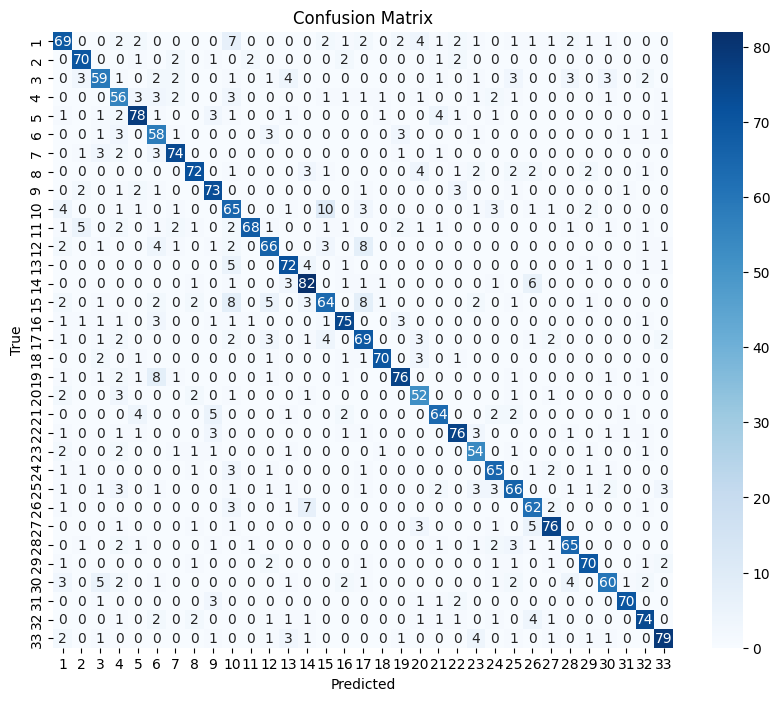

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       102
           1       0.83      0.86      0.85        81
           2       0.75      0.69      0.72        86
           3       0.62      0.72      0.67        78
           4       0.82      0.81      0.82        96
           5       0.64      0.79      0.71        73
           6       0.85      0.87      0.86        85
           7       0.86      0.79      0.82        91
           8       0.78      0.86      0.82        85
           9       0.60      0.69      0.64        94
          10       0.94      0.74      0.83        92
          11       0.76      0.73      0.75        90
          12       0.80      0.85      0.82        85
          13       0.80      0.85      0.82        97
          14       0.74      0.64      0.68       100
          15       0.84      0.83      0.84        90
          16       0.70      0.76      0.73        91
          17       0.93    

In [ ]:
# Evaluate the model with top 5 accuracy
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
                "11", "12", "13", "14", "15", "16", "17", "18", "19", "20",
                "21", "22", "23", "24", "25", "26", "27", "28", "29", "30",
                "31", "32", "33"]


# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes)
print(class_report)

## K-Fold Cross Validation

Fold 1: Final Train Accuracy: 1.0000, Final Validation Accuracy: 0.8102
Fold 2: Final Train Accuracy: 1.0000, Final Validation Accuracy: 0.7895
Fold 3: Final Train Accuracy: 0.9999, Final Validation Accuracy: 0.7894
Fold 4: Final Train Accuracy: 1.0000, Final Validation Accuracy: 0.7846
Fold 5: Final Train Accuracy: 0.9808, Final Validation Accuracy: 0.7167


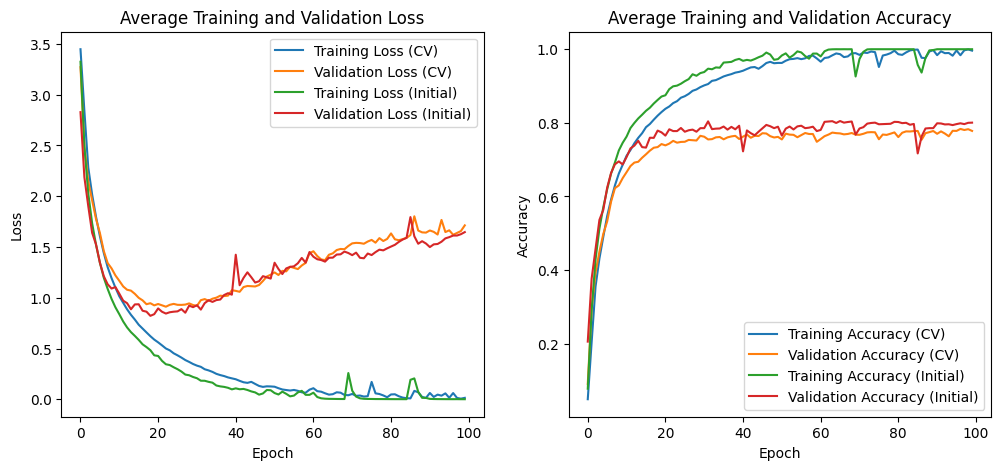

89/89 [==============================] - 0s 3ms/step
Test Accuracy: 0.7924594785059902


In [ ]:
# Initialize StratifiedKFold
num_folds = 5
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store results across folds
all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

# Initialize lists to store final results for each fold
final_train_acc = []
final_val_acc = []


# Iterate through the folds
for train_index, val_index in stratified_kfold.split(X_train, np.argmax(y_train_one_hot, axis=1)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_one_hot[train_index], y_train_one_hot[val_index]

    # Clone the initial model to ensure a fresh copy for each fold
    fold_model = tf.keras.models.clone_model(model)
    fold_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', top5_acc])

    # Train the model for this fold
    fold_history = fold_model.fit(X_train_fold, y_train_fold, batch_size=batch_size, epochs=epochs, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Append the results for this fold
    all_train_loss.append(fold_history.history['loss'])
    all_val_loss.append(fold_history.history['val_loss'])
    all_train_acc.append(fold_history.history['accuracy'])
    all_val_acc.append(fold_history.history['val_accuracy'])

     # Store the final accuracy for this fold
    final_train_acc.append(fold_history.history['accuracy'][-1])
    final_val_acc.append(fold_history.history['val_accuracy'][-1])

#Display the final accuracy for each fold (too many values otherwise)
for i, (train_acc, val_acc) in enumerate(zip(final_train_acc, final_val_acc), start=1):
    print(f"Fold {i}: Final Train Accuracy: {train_acc:.4f}, Final Validation Accuracy: {val_acc:.4f}")

# Plot the average training and validation loss and accuracy across folds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), np.mean(all_train_loss, axis=0), label='Training Loss (CV)')
plt.plot(range(epochs), np.mean(all_val_loss, axis=0), label='Validation Loss (CV)')
plt.plot(range(epochs), history.history['loss'], label='Training Loss (Initial)')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss (Initial)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), np.mean(all_train_acc, axis=0), label='Training Accuracy (CV)')
plt.plot(range(epochs), np.mean(all_val_acc, axis=0), label='Validation Accuracy (CV)')
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy (Initial)')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy (Initial)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Average Training and Validation Accuracy')
plt.legend()

plt.show()

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = np.argmax(y_test_one_hot, axis=1)
test_accuracy = accuracy_score(y_test_true_labels, y_test_pred_labels)
print(f'Test Accuracy: {test_accuracy}')

## Sample Images

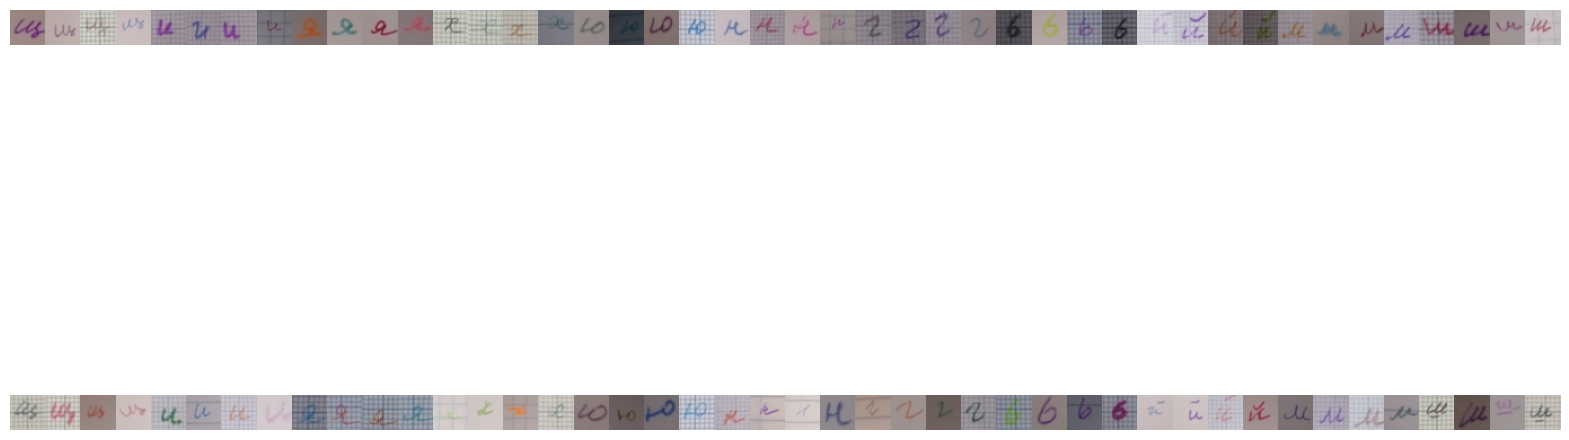

In [ ]:
# Function to display sample images from different classes
def display_sample_images(X, y, class_labels, num_samples=4, rows=2, show_third_classes=True):
    # Determine the number of classes to display based on the flag
    num_classes_to_display = len(class_labels) // 3 if show_third_classes else len(class_labels)

    # Set the size of the figure based on the number of rows, classes, and samples
    fig, axes = plt.subplots(rows, num_classes_to_display * num_samples, figsize=(20, 5 * rows))

    # Adjust the space between subplots
    plt.subplots_adjust(wspace=0, hspace=0)

    # Shuffle the indices of the classes
    shuffled_indices = np.arange(len(class_labels))
    np.random.shuffle(shuffled_indices)

    for i in range(rows):
        for j in range(num_classes_to_display):
            original_index = shuffled_indices[j]
            class_label = class_labels[original_index]

            # Find the indices of samples for the current class
            class_indices = np.where(y == original_index)[0]

            # Take a random sample from the current class
            random_sample_indices = np.random.choice(class_indices, size=num_samples, replace=False)

            for k, sample_index in enumerate(random_sample_indices):
                axes[i, j * num_samples + k].imshow(X[sample_index])
                axes[i, j * num_samples + k].axis('off')

                # Remove padding from the displayed images
                axes[i, j * num_samples + k].xaxis.set_major_locator(plt.NullLocator())
                axes[i, j * num_samples + k].yaxis.set_major_locator(plt.NullLocator())

    plt.show()

# Display 4 sample images for each class with larger images in 2 rows
# and show images for only a third of the classes, randomly selected
display_sample_images(X_train, y_train, class_labels, num_samples=4, rows=2, show_third_classes=True)
